In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

### Goal

This note is focus on how to analyse the Building and Property Violations

Are there certain landlords/ management companies that have repeated violations?

Are there common features of certain buildings (same build year, etc)?

What neighborhoods/ communities are affected most?

What kinds of building complaints are people making around the city?


In [3]:
file_path = "E:\Desktop\Study\BU\Sem2\DataScience\project\\build_prop_violations.csv"
data = pd.read_csv(file_path)
data.head()

,case_no,ap_case_defn_key,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,...,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location,geom_point_2249,geom_point_4326
0,V81124,1013,NaN,Open,300.15,NaN,"Boxes, Where Required",83,,Tyler,...,NaN,Boston,MA,02111,138849.0,42.349028,-71.061613,"(42.34902752521983, -71.06161347530092)",0101000020C9080000019211311EA4274198D3509EA386...,0101000020E6100000435AA579F1C351C08B1C17EFAC2C...
1,V91983,1013,NaN,Closed,121.2,NaN,Unsafe and Dangerous,302,NaN,Sumner,...,NaN,East Boston,MA,02128,132380.0,42.367678,-71.036580,"(42.367678491544524, -71.03658037747812)",0101000020C908000000B62102B2D82741433D7DE4FB93...,0101000020E6100000683C395557C251C02C50BC16102F...
2,V738256,1013,2024-02-05 15:22:17,Open,105.1,NaN,Failure to Obtain Permit,123,NaN,Nottinghill,...,NaN,BRIGHTON,MA,02135,104234.0,42.343920,-71.148581,"(42.343919640314574, -71.14858068184424)",0101000020C908000002D88A2084EC2641FCF2F677CA82...,0101000020E6100000A8558C5882C951C035CD0B8F052C...
3,V738250,1013,2024-02-05 15:14:55,Open,105.1,NaN,Failure to Obtain Permit,272,276,Hyde Park,...,NaN,JAMAICA PLAIN,MA,02130,77289.0,42.292150,-71.117581,"(42.292149607069526, -71.11758072813018)",0101000020C9080000FE960D5CA62E27410976B68C035E...,0101000020E6100000607D517186C751C091F387286525...
4,V679074,1013,2024-02-05 15:02:11,Open,116,NaN,Unsafe Structures,44,NaN,Longfellow,...,NaN,DORCHESTER,MA,02122,87143.0,42.303210,-71.064711,"(42.303209532712025, -71.06471058438673)",0101000020C90800007B0FAE443E9E2741F853040C0566...,0101000020E610000059E9DC3724C451C0B36AE991CF26...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15609 entries, 0 to 15608
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           15609 non-null  object 
 1   ap_case_defn_key  15609 non-null  int64  
 2   status_dttm       15607 non-null  object 
 3   status            15609 non-null  object 
 4   code              15609 non-null  object 
 5   value             0 non-null      float64
 6   description       15368 non-null  object 
 7   violation_stno    15609 non-null  object 
 8   violation_sthigh  4624 non-null   object 
 9   violation_street  15609 non-null  object 
 10  violation_suffix  15496 non-null  object 
 11  violation_city    15606 non-null  object 
 12  violation_state   15609 non-null  object 
 13  violation_zip     15606 non-null  object 
 14  ward              15609 non-null  object 
 15  contact_addr1     15604 non-null  object 
 16  contact_addr2     2853 non-null   object

### Q1 Are there certain landlords/ management companies that have repeated violations?

In [17]:

violation_counts = data['contact_addr1'].value_counts()

repeated_violations = violation_counts[violation_counts > 2]
repeated_violations.head(20)

619 CENTRE ST                            42
71 Rogers St                             25
660 Centre St                            24
40 EVERETT ST                            22
619 Centre Street                        22
Alpha Management                         19
619 CENTRE STREET                        18
7 Everett Ave                            14
60 LEO M BIRMINGHAM PKWY                 14
15 Woodbriar Road                        14
8 Marcy Road                             13
14 WHITING RD                            13
68 HAROLD ST                             13
C/O PREMIER PROPERTY SOLUTIONS           12
330 ADAMS ST                             12
10 Marcy Rd                              11
Shear-Yashub Israel-Shear Yashub, agt    11
31 Milk Street  Suite 501                11
72 Highland Dr                           11
14221 Dallas Parkway, Suite 1000         11
Name: contact_addr1, dtype: int64

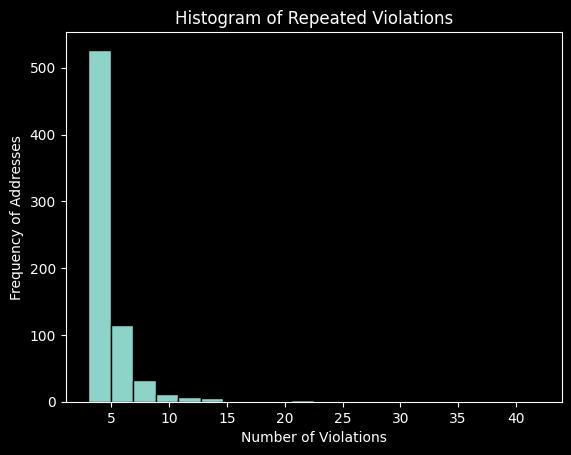

In [18]:
plt.hist(repeated_violations, bins=20, edgecolor='black')
plt.title('Histogram of Repeated Violations')
plt.xlabel('Number of Violations')
plt.ylabel('Frequency of Addresses')
plt.show()

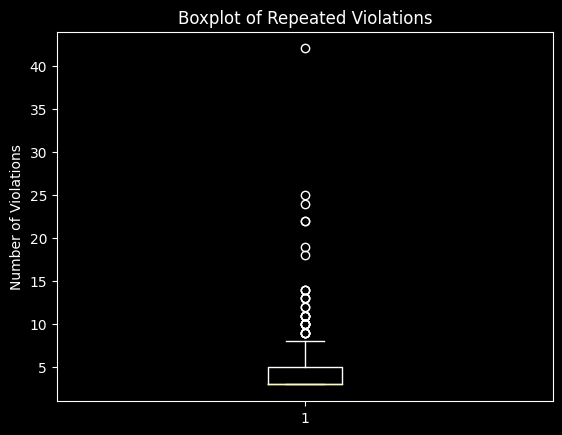

In [21]:
plt.boxplot(repeated_violations)
plt.title('Boxplot of Repeated Violations')
plt.ylabel('Number of Violations')
plt.show()

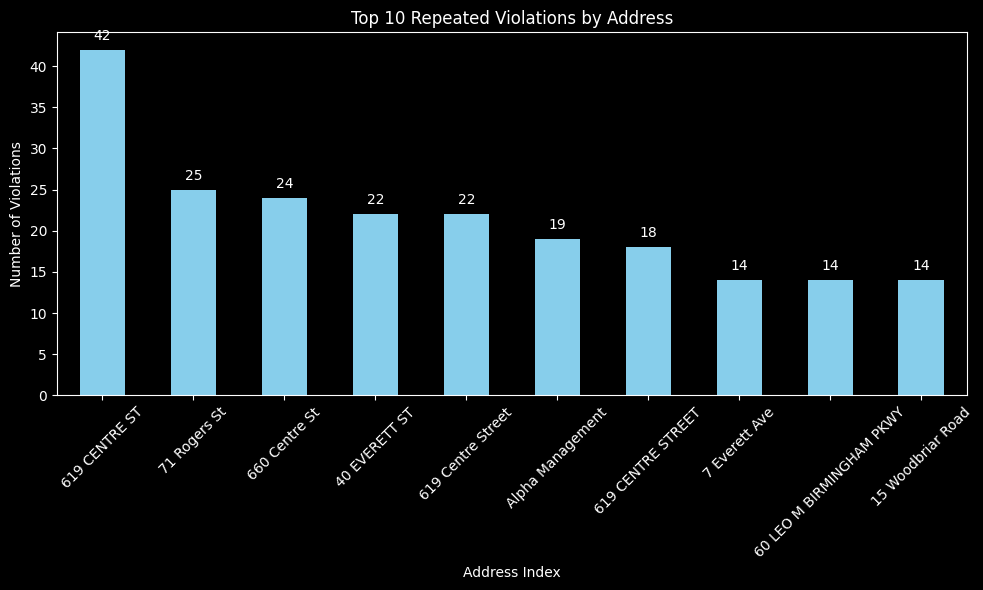

In [19]:

# 选择排名前10的违规次数
top_10_repeated_violations = repeated_violations.head(10)

# 绘制柱状图
fig, ax = plt.subplots(figsize=(10, 6))
top_10_repeated_violations.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Top 10 Repeated Violations by Address')
ax.set_xlabel('Address Index')
ax.set_ylabel('Number of Violations')

# 在每个柱子上标注数值
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


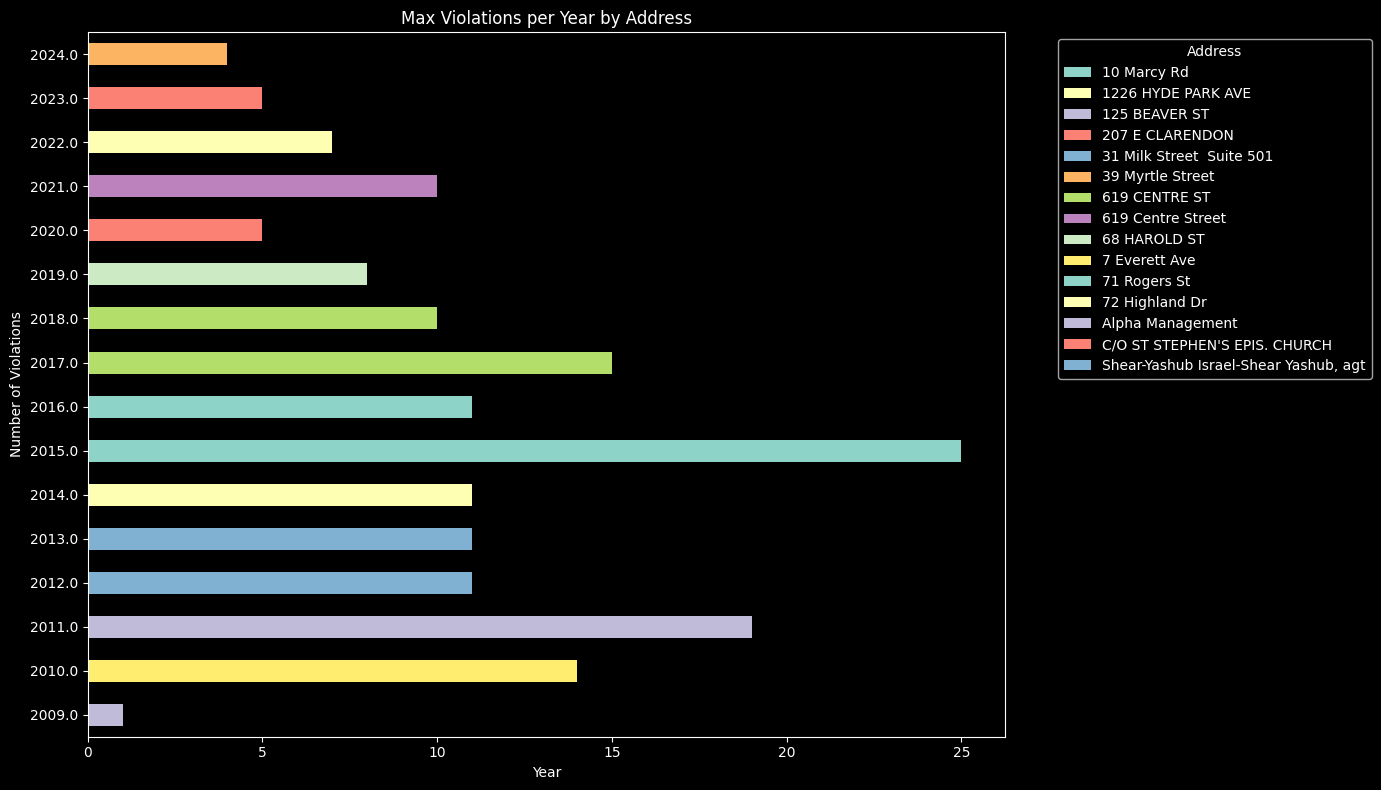

In [12]:

# 提取年份信息并创建新列
data['year'] = pd.to_datetime(data['status_dttm'], errors='coerce').dt.year

# 根据年份和地址（contact_addr1）分组，计算每年每个地址的违规次数
yearly_violations = data.groupby(['year', 'contact_addr1']).size().reset_index(name='counts')

# 找出每年违规次数最多的地址及其次数
max_violations_per_year = yearly_violations.loc[yearly_violations.groupby('year')['counts'].idxmax()]

# 对于绘图，确定每年最多违规的地址
max_violations_per_year_plot = max_violations_per_year.pivot(index='year', columns='contact_addr1', values='counts').fillna(0)

# 绘制每年违规最多的地址及其次数
max_violations_per_year_plot.plot(kind='barh', stacked=True, figsize=(14, 8))
plt.title('Max Violations per Year by Address')
plt.xlabel('Year')
plt.ylabel('Number of Violations')
plt.legend(title='Address', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Q2 Are there common features of certain buildings (same build year, etc)?

### Q3 What neighborhoods/ communities are affected most?

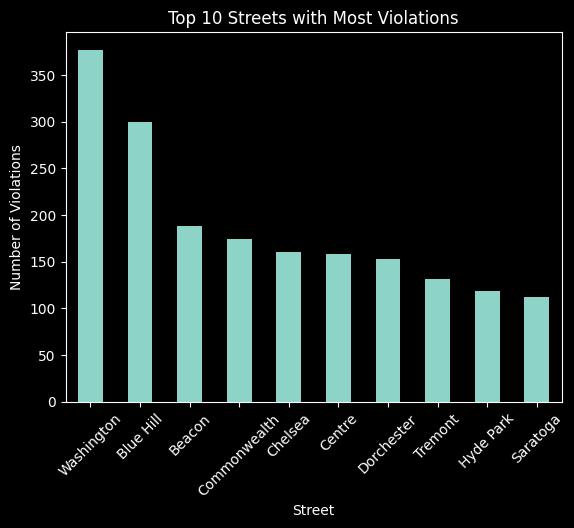

In [5]:
# Street
# 计算每个街道的违规案件数量
street_violation_counts = data['violation_street'].value_counts()

# 选择违规次数最多的前10个街道
top_streets = street_violation_counts.head(10)

# 绘制柱状图
top_streets.plot(kind='bar')
plt.title('Top 10 Streets with Most Violations')
plt.xlabel('Street')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.show()

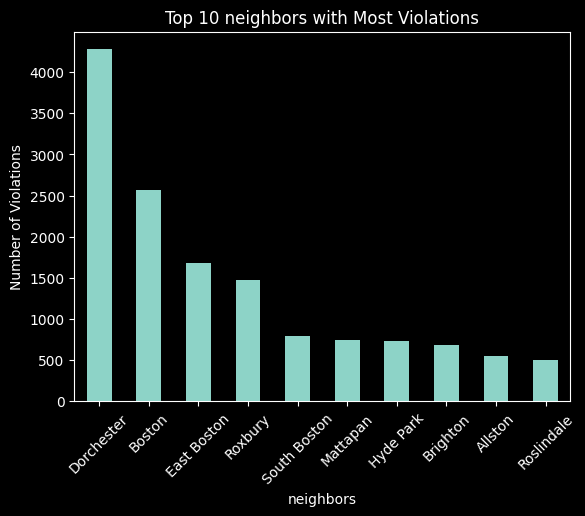

In [5]:
# Using violation_city, before zip transfering
# 计算每个街区的违规案件数量
street_violation_counts = data['violation_city'].value_counts()

# 选择违规次数最多的前10个街道
top_streets = street_violation_counts.head(10)

# 绘制柱状图
top_streets.plot(kind='bar')
plt.title('Top 10 neighbors with Most Violations')
plt.xlabel('neighbors')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.show()

In [4]:
def zip_to_neighbor(zippy):
    # some change
    zippy = str(zippy).strip()
    if not zippy.isdigit():
        return "Not in Boston"
    code = int(zippy)
    if code in [2134, 2163]:
        return "Allston"
    if code == 2135:
        return "Brighton"
    if code in [2108, 2116, 2117, 2123, 2133, 2199, 2216, 2217, 2295]:
        return "Back Bay/Beacon Hill"
    if (code >= 2101 and code <= 2107) or (code >= 2109 and code <= 2114) or code == 2196 or (code >= 2201 and code <= 2209) or code == 2211 or code == 2212 or code == 2222 or code == 2293:
        return "Central Boston"
    if code == 2129:
        return "Charlestown"
    if code in [2122, 2124, 2125]:
        return "Dorchester"
    if code in [2128, 2228]:
        return "East Boston"
    if code in [2115, 2215]:
        return "Fenway/Kenmore"
    if code == 2136:
        return "Hyde Park"
    if code == 2130:
        return "Jamaica Plain"
    if code == 2126:
        return "Mattapan"
    if code == 2131:
        return "Roslindale"
    if code in [2119, 2120, 2121]:
        return "Roxbury"
    if code in [2127, 2210]:
        return "South Boston"
    if code == 2118:
        return "South End"
    if code == 2132:
        return "West Roxbury"

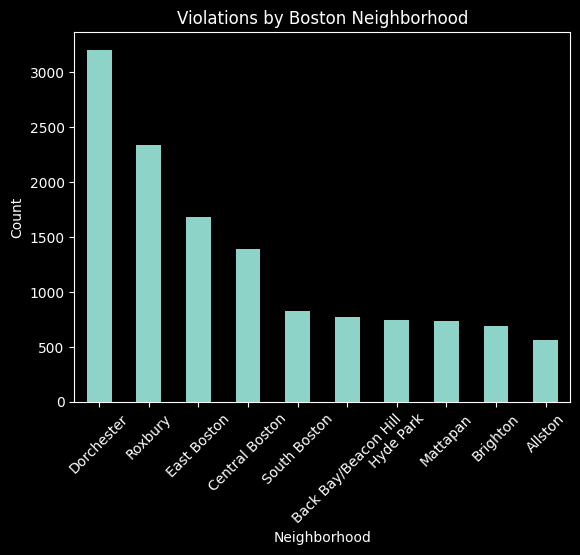

In [11]:
data['neighborhood'] = data['violation_zip'].apply(zip_to_neighbor)
neighborhood_counts = data['neighborhood'].value_counts().head(10)

neighborhood_counts.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Neighborhood')
plt.title('Violations by Boston Neighborhood')
plt.xticks(rotation=45)
plt.show()

In [4]:
# mapping
# 创建波士顿地图的中心点
boston_location = [42.3601, -71.0589]  # 波士顿的大致经纬度

# 创建一个地图，设置初始位置为波士顿，初始缩放级别为13
map_boston = folium.Map(location=boston_location, zoom_start=13)

# 初始化MarkerCluster对象
marker_cluster = MarkerCluster().add_to(map_boston)
filtered_data = data.dropna(subset=['latitude', 'longitude'])

# 假设data是包含违规数据的DataFrame，包括latitude和longitude列
for idx, row in filtered_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['violation_street'],  # 假设想在弹出窗口中显示街道名称
    ).add_to(marker_cluster)
map_boston.save('boston_violations_cluster_map.html')

### Q3.V2

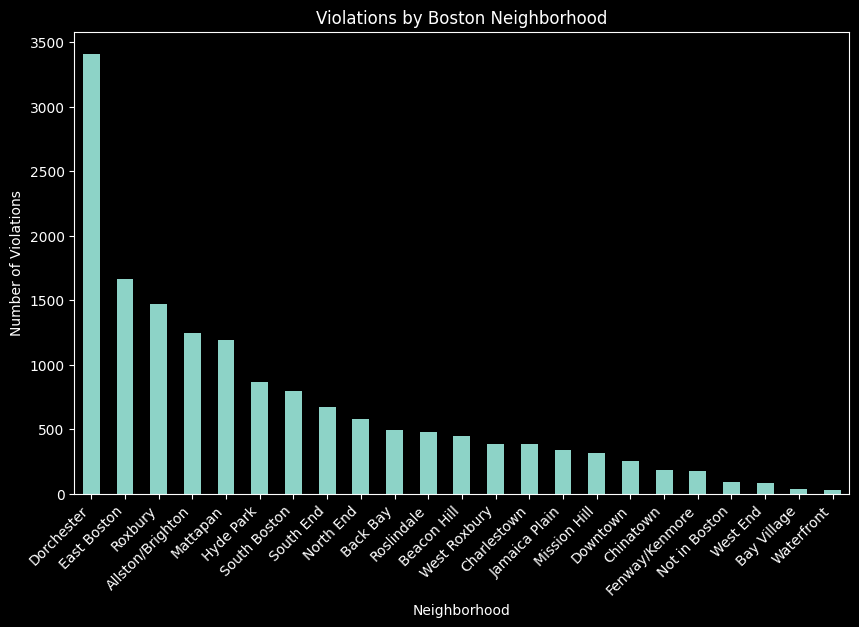

In [3]:
from test2 import checkNeighborhood, poly
neighborhoods = []
df = pd.read_csv('build_prop_violations.csv')
for index, row in df.iterrows():
    point = [row['latitude'], row['longitude']]
    neighborhood = checkNeighborhood(point, poly)
    neighborhoods.append(neighborhood)

# 将结果转换为DataFrame，以便更容易地进行分析和绘图
neighborhoods_df = pd.DataFrame(neighborhoods, columns=['Neighborhood'])

# 绘制直方图
neighborhoods_df['Neighborhood'].value_counts().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood')
plt.ylabel('Number of Violations')
plt.title('Violations by Boston Neighborhood')
plt.xticks(rotation=45, ha="right")
plt.show()

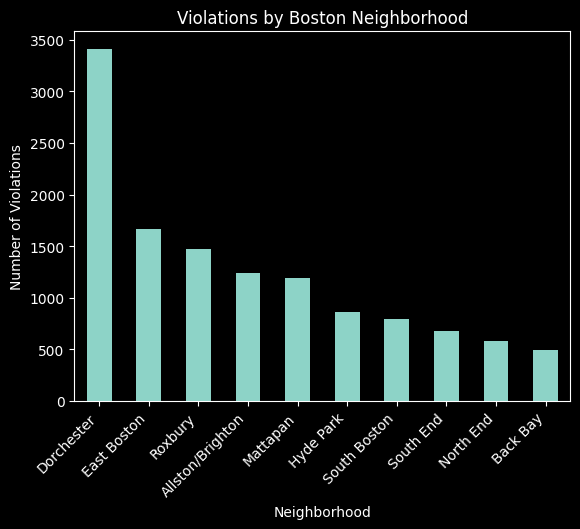

In [6]:

# 绘制直方图
neighborhoods_df['Neighborhood'].value_counts().head(10).plot(kind='bar')

plt.xlabel('Neighborhood')
plt.ylabel('Number of Violations')
plt.title('Violations by Boston Neighborhood')
plt.xticks(rotation=45, ha="right")
plt.show()

### Q4 What kinds of building complaints are people making around the city?

In [9]:
# number of status
status_counts = data['status'].value_counts()

# distribution of violation types
description_counts = data['description'].value_counts()

# number of violation in each city
city_counts = data['contact_city'].value_counts()

# top 10 types of violation
top_10_violation_types = data['description'].value_counts().nlargest(10).index

data['description_revised'] = data['description'].apply(lambda x: x if x in top_10_violation_types else 'Other')

top_10_violation_counts_revised = data['description_revised'].value_counts()
top_10_violation_counts_revised

Failure to Obtain Permit          3729
Unsafe and Dangerous              3606
Other                             3493
Maintenance                       1311
Testing & Certification            774
Right of Entry                     657
Unsafe Structures                  552
Inspections                        513
Failed to comply w permit term     409
Certificate of Occupancy           285
Building or Use of Premise req     280
Name: description_revised, dtype: int64

### 3 Visulaising

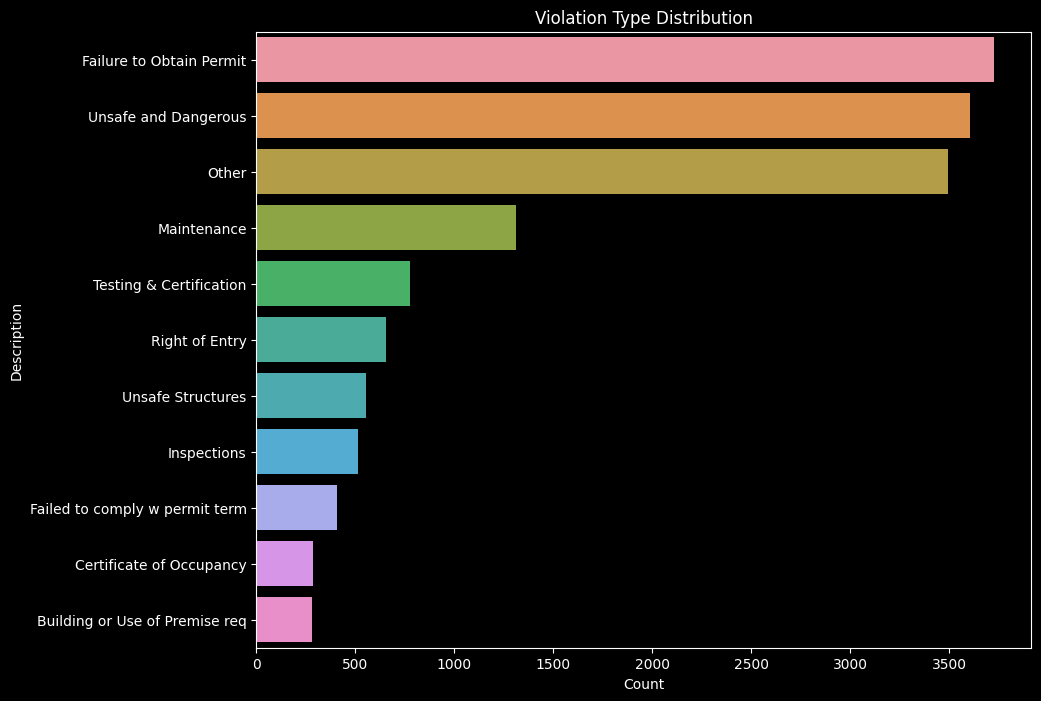

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.countplot(y='description_revised', data=data, order = data['description_revised'].value_counts().index)
plt.title('Violation Type Distribution')
plt.xlabel('Count')
plt.ylabel('Description')
plt.show()